# Analytics Intelligence Framework  
## Integrating Data Quality, Visualization and Machine Learning  

**Course:** Programming for Data Analytics  
**Dataset:** Superstore Sales Dataset  
**Objective:** To design and implement a complete analytics pipeline integrating data quality assessment, visualization, and predictive modeling for business intelligence.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [3]:
df = pd.read_csv("../data/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   str    
 2   Order Date     9800 non-null   str    
 3   Ship Date      9800 non-null   str    
 4   Ship Mode      9800 non-null   str    
 5   Customer ID    9800 non-null   str    
 6   Customer Name  9800 non-null   str    
 7   Segment        9800 non-null   str    
 8   Country        9800 non-null   str    
 9   City           9800 non-null   str    
 10  State          9800 non-null   str    
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   str    
 13  Product ID     9800 non-null   str    
 14  Category       9800 non-null   str    
 15  Sub-Category   9800 non-null   str    
 16  Product Name   9800 non-null   str    
 17  Sales          9800 non-null   float64
dtypes: float64(2), int6

In [5]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Quality Assessment

This section evaluates:
- Missing values
- Duplicate records
- Data types
- Outliers


In [7]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(0)

In [9]:
df = df.drop_duplicates()


In [11]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

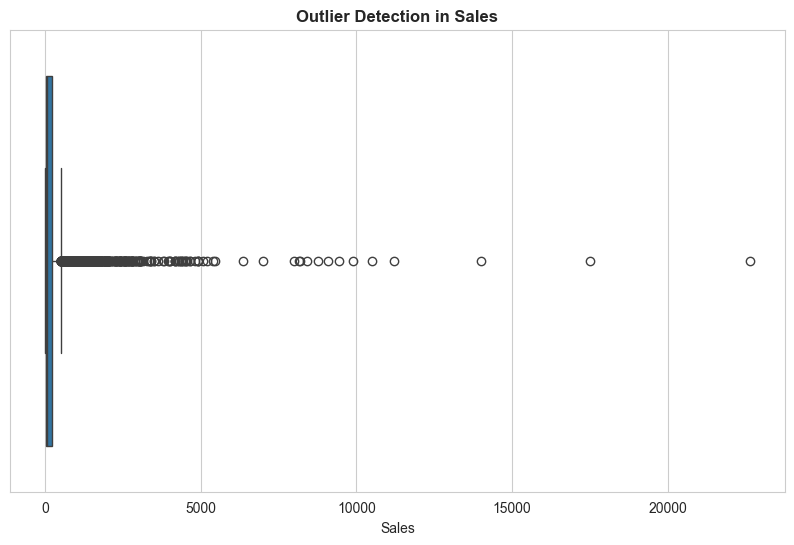

In [12]:
sns.boxplot(x=df["Sales"])
plt.title("Outlier Detection in Sales", fontweight="bold")
plt.show()


In [13]:
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month


## Exploratory Data Analysis & Visualization


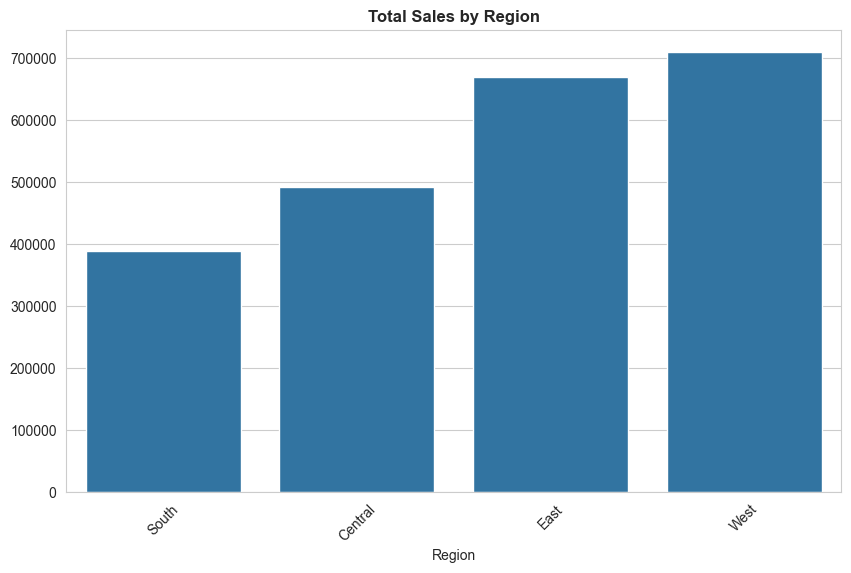

In [14]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values()

sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Total Sales by Region", fontweight="bold")
plt.xticks(rotation=45)
plt.show()


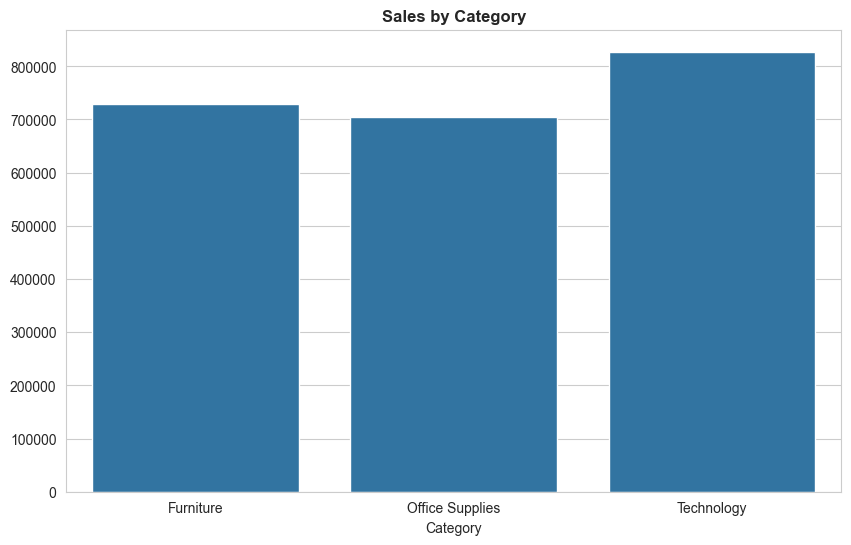

In [15]:
category_sales = df.groupby("Category")["Sales"].sum()

sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category", fontweight="bold")
plt.show()


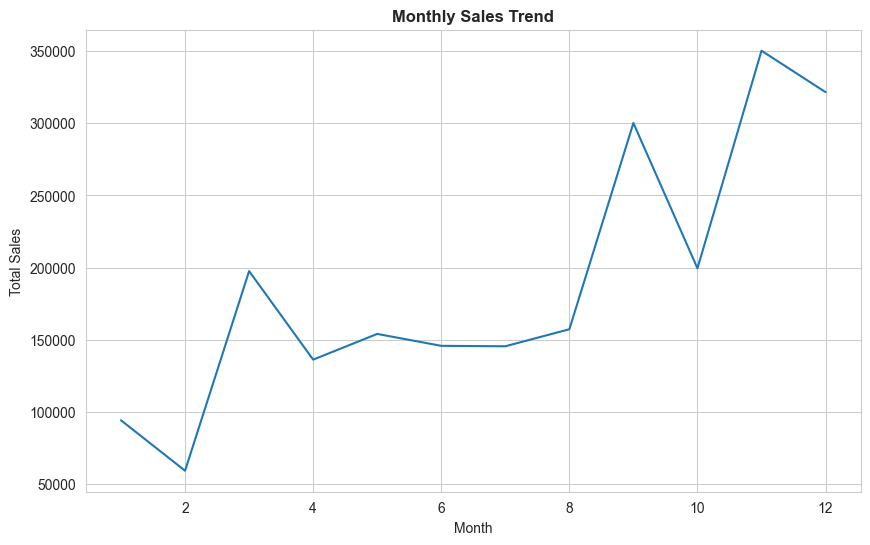

In [16]:
monthly_sales = df.groupby("Month")["Sales"].sum()

monthly_sales.plot()
plt.title("Monthly Sales Trend", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


## Predictive Modeling using Linear Regression

The objective is to predict Sales based on:
- Region
- Segment
- Category


In [17]:
df_model = pd.get_dummies(df[["Sales", "Region", "Segment", "Category"]], drop_first=True)

X = df_model.drop("Sales", axis=1)
y = df_model["Sales"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
y_pred = model.predict(X_test)


In [21]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 274.70125530907256
Mean Squared Error: 641004.2016209936
R2 Score: 0.040986846740160954


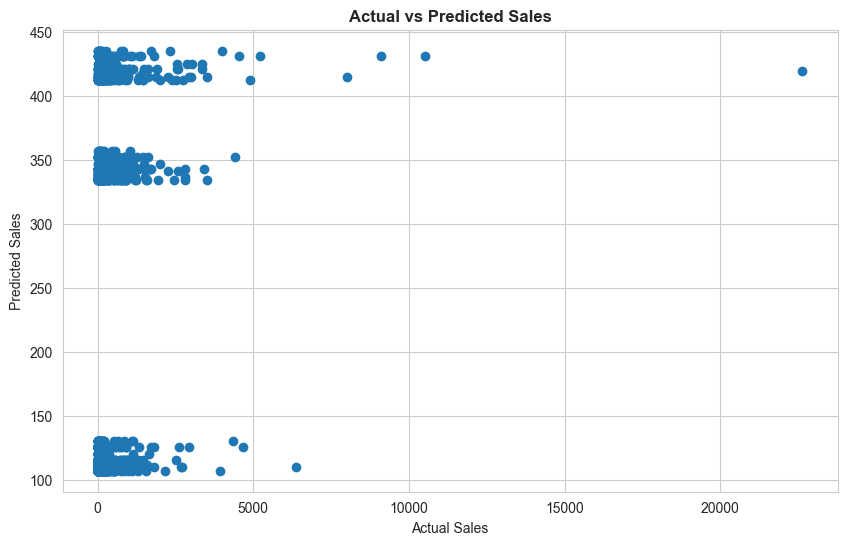

In [22]:
plt.scatter(y_test, y_pred)
plt.title("Actual vs Predicted Sales", fontweight="bold")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()


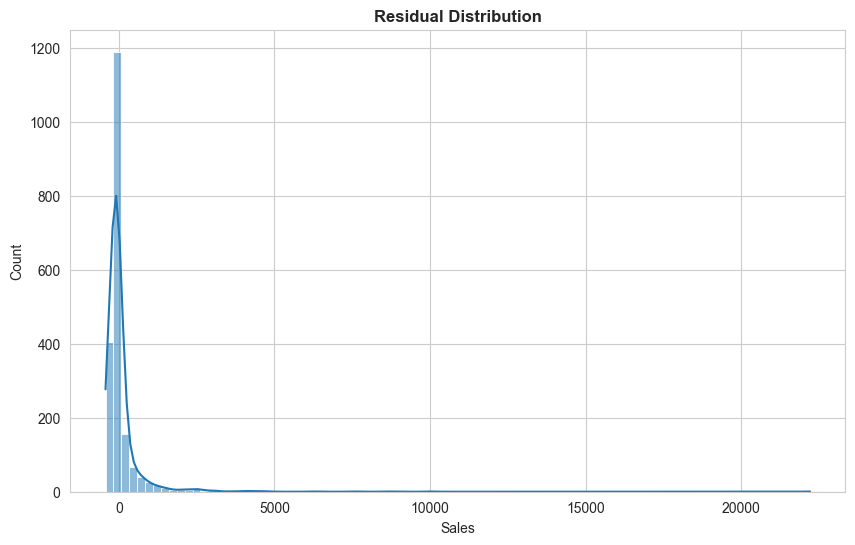

In [23]:
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution", fontweight="bold")
plt.show()


## Business Intelligence Insights

- The West region shows higher total sales contribution.
- Certain categories generate higher revenue.
- Monthly trends indicate seasonal variation.
- The regression model helps forecast sales performance.

This framework integrates data quality, visualization and predictive modeling 
to support business decision-making.


## Conclusion

This project successfully developed an Analytics Intelligence Framework 
by integrating:

1. Data Quality Assessment  
2. Exploratory Data Analysis  
3. Visualization Techniques  
4. Predictive Modeling  

The framework demonstrates how structured analytics pipelines 
can transform raw data into actionable business intelligence.
